# Hackcaton : Heart Risk

## Chargement et visualisation des données

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv('Data/train.csv')

In [4]:
df_test = pd.read_csv('Data/test.csv')

In [5]:
print(df_train.head())

   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     2.0     5.0  5132022       5    13   2022    1100.0  2022000436   
1     9.0     1.0  2282022       2    28   2022    1200.0  2022005381   
2    19.0     1.0  1202022       1    20   2022    1100.0  2022000927   
3    39.0     8.0  8122022       8    12   2022    1100.0  2022014408   
4    25.0     7.0  7222022       7    22   2022    1200.0  2022010910   

           _PSU  CTELENM1  ...  DRNKANY6      DROCDY4_  _RFBING6  \
0  2.022000e+09       1.0  ...       1.0  2.700000e+01       1.0   
1  2.022005e+09       NaN  ...       9.0  9.000000e+02       9.0   
2  2.022001e+09       1.0  ...       2.0  5.397605e-79       1.0   
3  2.022014e+09       NaN  ...       2.0  5.397605e-79       1.0   
4  2.022011e+09       NaN  ...       1.0  1.700000e+01       2.0   

       _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  ID  TARGET  
0  1.870000e+02       1.0       1.0       1.0       2.0   0    True  
1  9.990000e

# Colonnes à éliminer 

## Tri manuel

Après avoir parcouru le document LLCP 2022 Codebook Report nous décideront de nous affranchir des variables :

- FMONTH
- IDATE
- IMONTH
- IYEAR
- IDAY
- SEQNO
- _PSU
- CTELENM1
- PVTRESD1
- COLGHOUS
- STATERE1
- CELPHON1
- LADULT1
- COLGSEX1
- NUMADULT
- NUMMEN
- NUMWOMEN
- RESPSLCT
- LANDSEX1
- CELLSEX1
- SAFETIME
- CTELNUM1
- CELLFON5
- CADULT1
- PVTRESD3
- CCLGHOUS
- CSTATE1
- LANDLINE
- HHADULT
- LASTDEN4
- RMVTETH4
- NUMHHOL4
- VIRCOLO1
- TOLDCFS
- HAVECFS
- WORKCFS
- CAREGIV1
- CRGVREL4
- CSRVSUM
- CRGVLNG1
- CRGVHRS1
- CRGVPRB3
- CRGVALZD
- CRGVPER1
- CRGVHOU1
- CRGVEXPT
- FIREARM5
- GUNLOAD
- LOADULK2
- RCSGEND1
- RCSXBRTH
- RCSRLTN2
- CASTHDX2
- CASTHNO2
- BIRTHSEX
- WHEREGET
- NOBCUSE8
- RRCOGNT2
- QSTVER
- QSTLANG
- _STSTR
- _STRWT
- _RAWRAKE
- _WT2RAKE
- CAGEG
- _CLLCPWT
- _DUALUSE
- _DUALCOR
- _LLCPWT2
- _LLCPWT
- _EXTETH3
- _ALTETH3
- _PRACE2


In [6]:
df_réduit = df_train.drop(columns=[
    'FMONTH', 'IDATE', 'IMONTH', 'IYEAR', 'IDAY', 'SEQNO', '_PSU', 'CTELENM1', 
    'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 
    'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'LANDSEX1', 'CELLSEX1', 
    'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 
    'CSTATE1', 'LANDLINE', 'HHADULT', 'LASTDEN4', 'RMVTETH4', 'NUMHHOL4', 
    'VIRCOLO1', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'CAREGIV1', 'CRGVREL4', 
    'CSRVSUM', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 
    'CRGVHOU1', 'CRGVEXPT', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 
    'RCSXBRTH', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'WHEREGET', 
    'NOBCUSE8', 'RRCOGNT2', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', 
    '_RAWRAKE', '_WT2RAKE', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', 
    '_LLCPWT2', '_LLCPWT', '_EXTETH3', '_ALTETH3', '_PRACE2'
])

df_test = df_test.drop(columns=[
    'FMONTH', 'IDATE', 'IMONTH', 'IYEAR', 'IDAY', 'SEQNO', '_PSU', 'CTELENM1', 
    'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 
    'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'LANDSEX1', 'CELLSEX1', 
    'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 
    'CSTATE1', 'LANDLINE', 'HHADULT', 'LASTDEN4', 'RMVTETH4', 'NUMHHOL4', 
    'VIRCOLO1', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'CAREGIV1', 'CRGVREL4', 
    'CSRVSUM', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 
    'CRGVHOU1', 'CRGVEXPT', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 
    'RCSXBRTH', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'WHEREGET', 
    'NOBCUSE8', 'RRCOGNT2', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', 
    '_RAWRAKE', '_WT2RAKE', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', 
    '_LLCPWT2', '_LLCPWT', '_EXTETH3', '_ALTETH3', '_PRACE2'
])

# Corrélation

Bien que l'étude des corrélations nous semblait primordiale, l'utilisation de notre modèle a rendu cette analyse complètement dérisoire.

Nous laissons tout de même le code employé en guise de témoin du travail effectué.

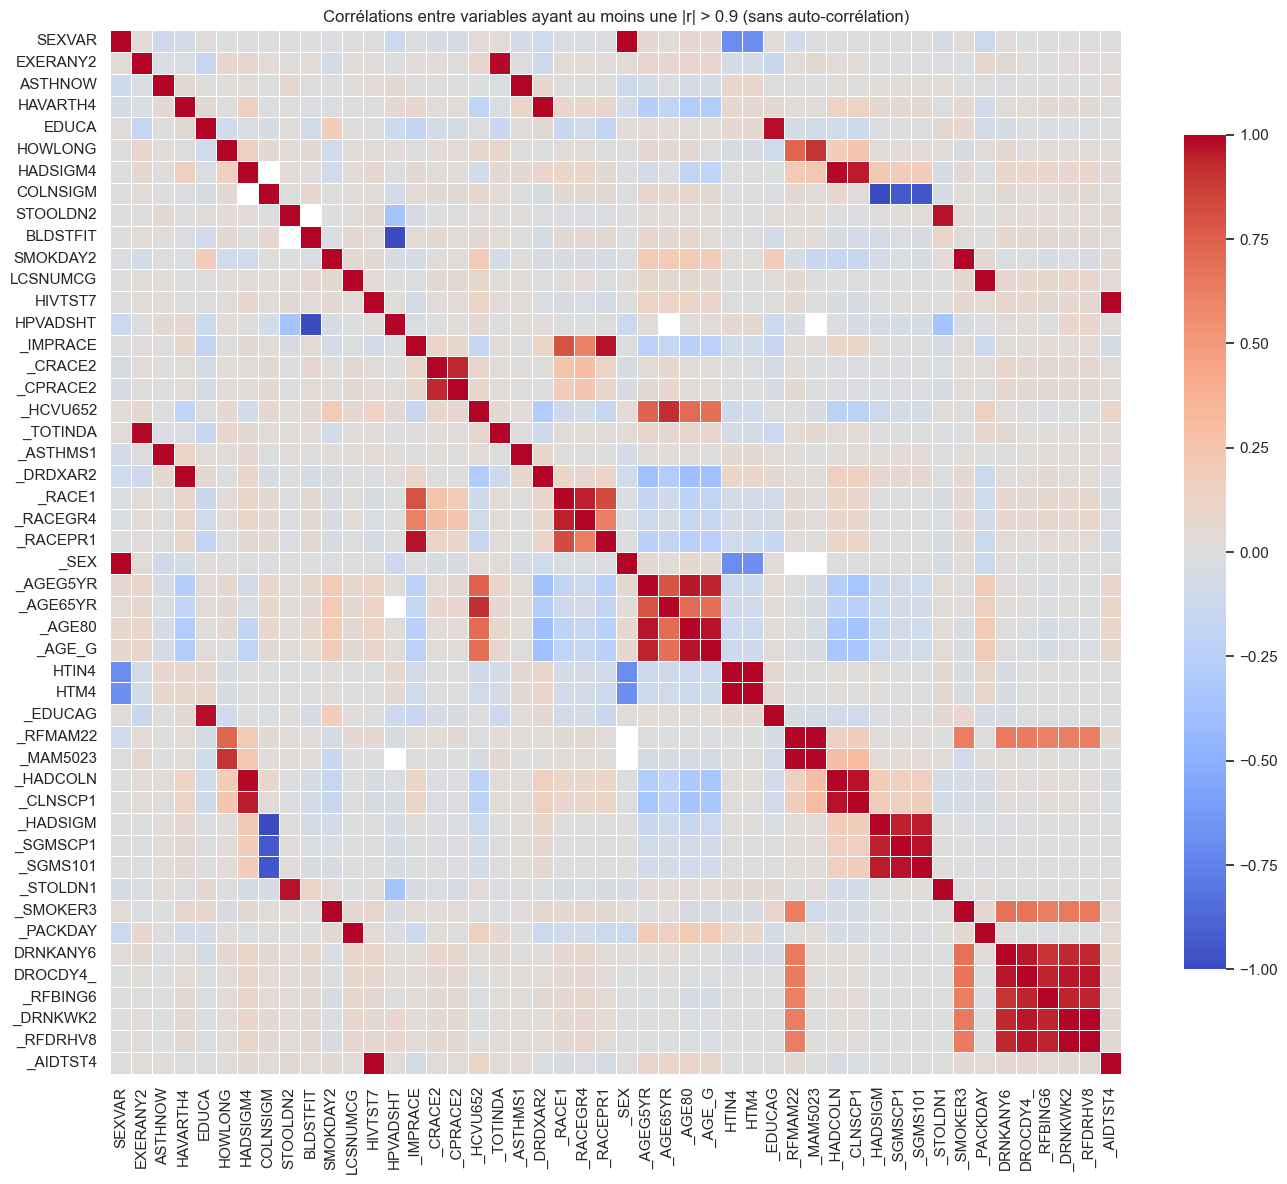

Nombre de paires avec |corr| > 0.9 : 39
Nombre de variables concernées : 48
   feature_1 feature_2      corr
0   BLDSTFIT  HPVADSHT -1.000000
1   _RFMAM22  _MAM5023  1.000000
2   HAVARTH4  _DRDXAR2  1.000000
3   LCSNUMCG  _PACKDAY  1.000000
4      HTIN4      HTM4  0.999628
5   SMOKDAY2  _SMOKER3  0.997445
6   _DRNKWK2  _RFDRHV8  0.996869
7     SEXVAR      _SEX  0.996477
8    ASTHNOW  _ASTHMS1  0.994255
9   COLNSIGM  _HADSIGM -0.993942
10   HIVTST7  _AIDTST4  0.992936
11  EXERANY2  _TOTINDA  0.991966
12  HADSIGM4  _HADCOLN  0.988280
13     EDUCA   _EDUCAG  0.979516
14  _SGMSCP1  _SGMS101  0.974233
15    _AGE80    _AGE_G  0.974025
16  STOOLDN2  _STOLDN1  0.971689
17  _IMPRACE  _RACEPR1  0.971256
18  _HADCOLN  _CLNSCP1  0.968849
19  _AGEG5YR    _AGE80  0.964468
20  DROCDY4_  _DRNKWK2  0.963520
21  DROCDY4_  _RFDRHV8  0.963157
22  DRNKANY6  DROCDY4_  0.961511
23  _HADSIGM  _SGMS101  0.959680
24  HADSIGM4  _CLNSCP1  0.959382
25  COLNSIGM  _SGMS101 -0.952474
26    _RACE1  _RACEGR4  0.951703


In [7]:
# Calcul de la matrice de corrélation et affichage en ne gardant que |corr| > 0.9
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélection des colonnes numériques
num_df = df_réduit.select_dtypes(include='number').copy()
corr_df = num_df.corr()

# Seuil
threshold = 0.9

# Mettre la diagonale à 0 pour ne pas compter les auto-corrélations
corr_no_diag = corr_df.copy()
np.fill_diagonal(corr_no_diag.values, 0)

# Identifier les colonnes ayant au moins une corrélation > threshold
mask_threshold = corr_no_diag.abs() > threshold
cols_to_keep = mask_threshold.any(axis=0)
selected_cols = corr_df.columns[cols_to_keep].tolist()

# Filtrer la matrice de corrélation
filtered_corr_matrix = corr_df.loc[selected_cols, selected_cols]

# Affichage de la heatmap sans chiffres (annot=False)
plt.figure(figsize=(14, 12))
sns.set(style='white')
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', annot=False,
            linewidths=.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title(f'Corrélations entre variables ayant au moins une |r| > {threshold} (sans auto-corrélation)')
plt.tight_layout()
plt.show()

# Extraire la liste des paires de variables avec |corr| > threshold (sans doublons i-j / j-i)
high_corr_filtered = corr_no_diag.where(corr_no_diag.abs() > threshold)
high_corr = high_corr_filtered.stack().reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'corr']

# Normaliser l'ordre des paires pour supprimer les duplicatas
high_corr['pair'] = high_corr.apply(lambda x: tuple(sorted([x['feature_1'], x['feature_2']])), axis=1)
high_corr = high_corr.drop_duplicates('pair').drop(columns='pair')

# Trier par valeur absolue de corrélation décroissante et afficher
high_corr = high_corr.reindex(high_corr['corr'].abs().sort_values(ascending=False).index)
print(f"Nombre de paires avec |corr| > {threshold} :", len(high_corr))
print(f"Nombre de variables concernées : {len(selected_cols)}")
print(high_corr.reset_index(drop=True))

# Cleaning

Malheureusement, le cleaning n'a rien donné et nous avons décidé de ne pas l'employer.

Nous laissons tout de même le code employé en guise de témoin du travail effectué.

In [ ]:
# on remplace les valeurs "missing" codées par NaN
missing_values = [7, 9, 77, 99, 777, 999, 9999]
df_réduit = df_réduit.replace(missing_values, np.nan)

In [7]:
# FEATURE TYPE DETECTION (Version optimisée)

# Aperçu des types de données
print(df_réduit.dtypes.value_counts(), "\n")

# Colonnes numériques continues (valeurs nombreuses)
# Seuil : > 100 valeurs distinctes
numeric_features = [
    col for col in df_réduit.columns
    if df_réduit[col].dtype in ['int64', 'float64'] and df_réduit[col].nunique(dropna=True) > 100
]

# Colonnes binaires (souvent Oui/Non ou codes 1/2/7/9)
# Seuil : ≤ 6 valeurs distinctes (certaines colonnes ont 1,2,7,9)
binary_features = [
    col for col in df_réduit.columns
    if df_réduit[col].dtype in ['int64', 'float64'] and 2 <= df_réduit[col].nunique(dropna=True) <= 6
]

# Colonnes catégorielles discrètes
categorical_features = [
    col for col in df_réduit.columns
    if df_réduit[col].dtype in ['int64', 'float64'] and 7 <= df_réduit[col].nunique(dropna=True) <= 25
]

# Colonnes textuelles ou non numériques
text_features = df_réduit.select_dtypes('object').columns.tolist()

# --- 5️⃣ Résumé clair
print("🔹 Variables numériques continues :", len(numeric_features))
print(numeric_features[:10], "\n")

print("🔹 Variables binaires :", len(binary_features))
print(binary_features[:10], "\n")

print("🔹 Variables catégorielles :", len(categorical_features))
print(categorical_features[:10], "\n")

if len(text_features) > 0:
    print("🔹 Variables textuelles :", len(text_features))
    print(text_features, "\n")

# Vérification de la couverture
classified = set(numeric_features + binary_features + categorical_features + text_features)
unclassified = [c for c in df_réduit.columns if c not in classified]

print("⚠️ Colonnes non classées :", len(unclassified))
if unclassified:
    print(unclassified, "\n")

print("Total colonnes classées :", len(classified))
print("Total colonnes dans df_réduit :", df_réduit.shape[1])

# --- 7️⃣ Exemple de valeurs pour vérification
print("----------------------------------------------------")
print("🔍 Vérification manuelle des premières colonnes détectées :\n")

for col in (binary_features[:3] + categorical_features[:3] + numeric_features[:3]):
    print(f"{col}: {df_réduit[col].unique()[:10]}")


float64    250
bool         1
Name: count, dtype: int64 

🔹 Variables numériques continues : 10
['WEIGHT2', 'HEIGHT3', 'LCSNUMCG', 'HIVTSTD3', 'WTKG3', '_BMI5', '_PACKDAY', '_PACKYRS', '_DRNKWK2', 'ID'] 

🔹 Variables binaires : 195
['DISPCODE', 'SEXVAR', 'GENHLTH', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW'] 

🔹 Variables catégorielles : 20
['PRIMINSR', 'SLEPTIM1', 'NUMPHON4', 'CPDEMO1C', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'COVIDPRM', 'PDIABTS1', 'DIABEDU1'] 

⚠️ Colonnes non classées : 26
['_STATE', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'DIABAGE4', 'LCSFIRST', 'LCSLAST', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLSHTMY3', 'CHKHEMO3', 'COVIDFS1', 'COVIDSE1', 'COPDSMOK', 'CNCRAGE', 'CNCRTYP2', 'MARIJAN1', '_AGE80', 'HTIN4', 'HTM4', '_YRSSMOK', '_YRSQUIT', 'DROCDY4_', 'TARGET'] 

Total colonnes classées : 225
Total colonnes dans df_réduit : 251
----------------------------------------------------
🔍 Vérification manuelle des premières colonnes dét

In [8]:
for col in binary_features:
    df_réduit[col] = df_réduit[col].map({1: 1, 2: 0})


for col in binary_features:
    # Remplacer les codes manquants
    df_réduit[col] = df_réduit[col].replace({7: np.nan, 9: np.nan, 77: np.nan, 99: np.nan})
    # Mapper 1 → 1 et 2 → 0
    df_réduit[col] = df_réduit[col].replace({1: 1, 2: 0})
    # Remplacer les NaN par 0 ou 1 aléatoirement
    df_réduit[col] = df_réduit[col].replace({np.nan: np.random.choice([0, 1])})

In [9]:
for col in categorical_features:
    for col in categorical_features:
        df_réduit[col] = df_réduit[col].replace({np.nan: np.random.randint([1, df_réduit[col].nunique(dropna=True)])})

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# ======================================================
# 🧩 NETTOYAGE ET NORMALISATION DES VARIABLES CONTINUES
# ======================================================

for col in numeric_features:
    if col in df_réduit.columns:
        # --- 1️⃣ Remplacer les codes aberrants / manquants
        df_réduit[col] = df_réduit[col].replace([7, 9, 77, 99, 777, 999, 7777, 9999, 99999], np.nan)

        # --- 2️⃣ Imputation des valeurs manquantes (médiane)
        df_réduit[col] = df_réduit[col].replace({np.nan: np.random.normal([df_réduit[col].min(), df_réduit[col].max()])})


In [36]:
df_réduit.head()

,_STATE,DISPCODE,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,...,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,ID,TARGET
0,2.0,1100.0,2.0,3.0,30.0,88.0,88.0,3.0,1.0,2.0,...,1.0,2.700000e+01,1.0,1.870000e+02,1.0,1.0,1.0,2.0,0,True
1,9.0,1200.0,2.0,3.0,88.0,15.0,14.0,10.0,2.0,2.0,...,9.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,NaN,1,False
2,19.0,1100.0,1.0,2.0,88.0,88.0,NaN,1.0,1.0,2.0,...,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,9.0,2,False
3,39.0,1100.0,1.0,3.0,88.0,88.0,NaN,1.0,3.0,2.0,...,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0,3,False
4,25.0,1200.0,1.0,3.0,88.0,3.0,88.0,9.0,2.0,2.0,...,1.0,1.700000e+01,2.0,4.670000e+02,1.0,NaN,NaN,2.0,4,False


## Entrainement du modèle

Nous avons commecé par stratifier le jeu d'entrainement afin d'optimiser l'entrainement de notre modèle.

In [37]:
X_train, y_train = df_réduit.drop(columns=['TARGET']), df_réduit['TARGET']

from sklearn.model_selection import train_test_split

# Split stratifié du jeu d'entraînement en train / validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.3, stratify=y_train, random_state=42
)

Puis, nous avons rapidement décidé d'employer le XGBoost capable de travailler avec des données hautement corrélées et des valeurs manquantes, d'autant plus que celui-ci était le seul capable de tourner sur l'ensemble des machines du groupe.

In [38]:
import xgboost as xgb
from sklearn.metrics import classification_report
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_tr, y_tr)
y_pred_xgb = model_xgb.predict(X_val)
print(classification_report(y_val, y_pred_xgb))

/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:23:03] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

       False       0.92      0.99      0.95     61458
        True       0.49      0.13      0.21      6042

    accuracy                           0.91     67500
   macro avg       0.70      0.56      0.58     67500
weighted avg       0.88      0.91      0.89     67500



L'entrainement d'un Random Forest a aussi été exploré mais les résultats n'étaient pas suffisamment satisfaisant.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

n_estimators = 100
# On utilise warm_start pour faire grandir la forêt progressivement et afficher la progression
model = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True, n_jobs=-1)

with tqdm(total=n_estimators, desc="Training RandomForest", unit="est") as pbar:
    for i in range(n_estimators):
        model.n_estimators = i + 1
        model.fit(X_tr, y_tr)
        pbar.update(1)

# On évalue le modèle 
y_pred_rf = model.predict(X_val)

print(classification_report(y_val, y_pred_rf))

Training RandomForest: 100%|██████████| 100/100 [00:55<00:00,  1.79est/s]


              precision    recall  f1-score   support

       False       0.91      1.00      0.95     61458
        True       0.61      0.03      0.07      6042

    accuracy                           0.91     67500
   macro avg       0.76      0.52      0.51     67500
weighted avg       0.89      0.91      0.87     67500



## Resampling


Mais pour optimiser les résultats, il est necessaire d'employer une méthode de resampling, les target étant largement minoritaires étant donné que les crises cardiaques tuent et rendent ainsi compliqué la communication téléphonique, à moins d'avoir un médium ou une table de Ouija sous la main... 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print("Shapes -> X_tr:", X_tr.shape, "X_val:", X_val.shape, "y_tr:", y_tr.shape, "y_val:", y_val.shape)
print("\nRépartition TARGET (train):\n", y_tr.value_counts(normalize=True))
print("\nRépartition TARGET (val):\n", y_val.value_counts(normalize=True))

# Évaluer les modèles existants sur la validation (si présents)
if 'model' in globals():
    y_pred_val_rf = model.predict(X_val)
    print("\nRandomForest (validation):")
    print(classification_report(y_val, y_pred_val_rf))
else:
    print("\nVariable 'model' (RandomForest) non trouvée.")

if 'model_xgb' in globals():
    y_pred_val_xgb = model_xgb.predict(X_val)
    print("\nXGBoost (validation):")
    print(classification_report(y_val, y_pred_val_xgb))
else:
    print("\nVariable 'model_xgb' (XGBoost) non trouvée.")

Shapes -> X_tr: (157500, 251) X_val: (67500, 251) y_tr: (157500,) y_val: (67500,)

Répartition TARGET (train):
 TARGET
False    0.910495
True     0.089505
Name: proportion, dtype: float64

Répartition TARGET (val):
 TARGET
False    0.910489
True     0.089511
Name: proportion, dtype: float64

RandomForest (validation):
              precision    recall  f1-score   support

       False       0.91      1.00      0.95     61458
        True       0.61      0.03      0.07      6042

    accuracy                           0.91     67500
   macro avg       0.76      0.52      0.51     67500
weighted avg       0.89      0.91      0.87     67500


XGBoost (validation):
              precision    recall  f1-score   support

       False       0.92      0.99      0.95     61458
        True       0.49      0.13      0.21      6042

    accuracy                           0.91     67500
   macro avg       0.70      0.56      0.58     67500
weighted avg       0.88      0.91      0.89     67500



La première méthode employée est celle du tirage avec remise d'un nombre de target prédéfini afin d'éviter l'undersampling.

In [41]:
# Séparer les classes
X_1 = X_train[y_train == 1]
X_0 = X_train[y_train == 0]
y_1 = y_train[y_train == 1]
y_0 = y_train[y_train == 0]

# Calcul du nombre total pour obtenir 30% de 1
n_total = len(y_train)
n_1_target = int(n_total * 0.3)
n_0_target = n_total - n_1_target

# Sur-échantillonnage des 1
X_1_oversampled = X_1.sample(n=n_1_target, replace=True, random_state=42)
y_1_oversampled = y_1.sample(n=n_1_target, replace=True, random_state=42)

# Sous-échantillonnage des 0
X_0_undersampled = X_0.sample(n=n_0_target, random_state=42)
y_0_undersampled = y_0.sample(n=n_0_target, random_state=42)

# Concaténer
X_train_balanced = pd.concat([X_1_oversampled, X_0_undersampled])
y_train_balanced = pd.concat([y_1_oversampled, y_0_undersampled])

# Mélanger
X_train_balanced, y_train_balanced = X_train_balanced.sample(frac=1, random_state=42), y_train_balanced.sample(frac=1, random_state=42)

print(y_train_balanced.value_counts(normalize=True))

TARGET
False    0.7
True     0.3
Name: proportion, dtype: float64


Comme on peut l'observer, les performances de notre modèle s'en voient grandement améliorée 

In [42]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Adapter XGBoost aux données augmentées (équilibrées)
model_xgb_balanced = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_xgb_balanced = model_xgb_balanced.predict(X_train_balanced)
print(classification_report(y_train_balanced, y_pred_xgb_balanced))

/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:24:58] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

       False       0.88      0.91      0.89    157500
        True       0.77      0.71      0.74     67500

    accuracy                           0.85    225000
   macro avg       0.83      0.81      0.82    225000
weighted avg       0.85      0.85      0.85    225000



In [43]:
# Génération du fichier de soumission avec le modèle XGBoost équilibré

# Aligner les features du test sur celles utilisées par le modèle
X_test = df_test.reindex(columns=X_train.columns, fill_value=0)

# Prédiction binaire sur le test set avec le modèle équilibré
y_pred_test_balanced = model_xgb_balanced.predict(X_test).astype(int)

# Construire et sauvegarder le fichier de soumission
submission_balanced = pd.DataFrame({
    'ID': df_test['ID'],
    'TARGET': y_pred_test_balanced
})

submission_balanced.to_csv('submission_balanced.csv', index=False)
print("Fichier créé: submission_balanced.csv")

Fichier créé: submission_balanced.csv


Mais c'est par la méthode de mise à l'échelle, couplée à un SearchGrid que nous obtiendrons les meilleurs résultats.

In [44]:
import numpy as np
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.metrics import f1_score, classification_report
import xgboost as xgb
import pandas as pd
import numpy as np

params = {
    'colsample_bytree': 0.6,
    'gamma': 2,
    'learning_rate': 0.05,
    'max_depth': 3,
    'min_child_weight': 3,
    'n_estimators': 390,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'subsample': 0.9
}

from collections import Counter
count = Counter(y_train)
scale_pos_weight = count[0] / count[1]
print(scale_pos_weight)

params['scale_pos_weight'] = scale_pos_weight
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'aucpr'


model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_val)[:, 1]


thresholds = np.arange(0.01, 1, 0.01)
f1_scores = [f1_score(y_val, (y_proba > t).astype(int)) for t in thresholds]

best_t = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("🔥 Meilleur seuil :", best_t)
print("🚀 F1 optimisé :", best_f1)

y_pred_opt = (y_proba > best_t).astype(int)


10.172352152539847
🔥 Meilleur seuil : 0.73
🚀 F1 optimisé : 0.43012973600981086


Aussi, nous avons tuned notre modèle par l'ajout de la cellule suivante, conseillée par notre LLM.

In [45]:
from scipy.special import logit, expit
# Décalage (à tester : 0.5, 1.0, 1.5)
logit_shift = -0.05
y_proba = model.predict_proba(X_val)[:, 1]
y_proba_shifted = expit(logit(y_proba) + logit_shift)
thresholds = np.arange(0.01, 1, 0.01)
f1_scores = [f1_score(y_val, (y_proba_shifted > t).astype(int)) for t in thresholds]
best_t = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)
print(":feu: Nouveau seuil (avec logit shift):", best_t)
print(":fusée: Nouveau F1 :", best_f1)

:feu: Nouveau seuil (avec logit shift): 0.72
:fusée: Nouveau F1 : 0.43010197495804825


Tout cela nous a permis d'obtenir les scores suivant et le fichier réponse submitted.

In [46]:
from sklearn.metrics import classification_report
# --- Évaluation finale sur validation AVEC SEUIL ---
y_val_proba = model.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_proba > best_t).astype(int)  # <-- seuil appliqué
print("\n:histogramme: Rapport sur le set de validation (seuil optimisé) :\n")
print(classification_report(y_val, y_val_pred))
# --- Prédiction sur le test avec le même seuil ---
df_test_aligned = df_test[X_train.columns]
y_test_proba = model.predict_proba(df_test_aligned)[:, 1]
y_test_pred = (y_test_proba > best_t).astype(int)  # <-- seuil appliqué ici aussi
# --- Création du fichier submission ---
submission = pd.DataFrame({
    'ID': df_test['ID'],
    'target': y_test_pred.astype(bool)  # ou .astype(int) selon le format attendu
})
submission.to_csv('submission_best_threshold.csv', index=False)
print(":coche_blanche: Fichier 'submission_best_threshold.csv' créé avec seuil optimisé :", best_t)



:histogramme: Rapport sur le set de validation (seuil optimisé) :

              precision    recall  f1-score   support

       False       0.95      0.89      0.92     61458
        True       0.34      0.57      0.43      6042

    accuracy                           0.86     67500
   macro avg       0.65      0.73      0.68     67500
weighted avg       0.90      0.86      0.88     67500

:coche_blanche: Fichier 'submission_best_threshold.csv' créé avec seuil optimisé : 0.72


## Annexe

Ici, vous pourrez trouver les méthodes d'amélioration misent en place comme le SearchGrid ou le RandomizedSearch, très coûteuse en puissance de calcul mais inévitables pour maximiser nos résultats.

In [30]:
# ...existing code...
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Définir les paramètres pour GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Créer le modèle XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

# Entraîner le modèle avec GridSearch
print("Début de la recherche de grille...")
try:
    grid_search.fit(X_train_balanced, y_train_balanced)
except Exception as e:
    print(f"Erreur lors de l'entraînement avec GridSearchCV: {e}")

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

# Entraîner le meilleur modèle final
best_model_grid = grid_search.best_estimator_

# Prédiction sur le jeu de validation
y_pred_val_grid = best_model_grid.predict(X_val)
print("\n📈 Performance sur validation:")
print(classification_report(y_val, y_pred_val_grid))

# Génération du fichier de soumission
X_test = df_test.reindex(columns=X_train.columns, fill_value=0)
y_pred_test_grid = best_model_grid.predict(X_test).astype(int)

submission_grid = pd.DataFrame({
    'ID': df_test['ID'],
    'TARGET': y_pred_test_grid
})

submission_grid.to_csv('submission_grid.csv', index=False)
print("✅ Fichier créé: submission_grid.csv")
print(submission_grid.head())
# ...existing code...

Début de la recherche de grille...
Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:32:42] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:32:42] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:32:42] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt

KeyboardInterrupt: 

In [16]:
# ...existing code...
from sklearn.metrics import f1_score, make_scorer, classification_report
import xgboost as xgb
from sklearn.model_selection import ParameterSampler, StratifiedKFold
from sklearn.base import clone
from tqdm.auto import tqdm
import pandas as pd
import numpy as np

# ======================================================
# 🎲 RECHERCHE MANUELLE (RANDOMIZED) AVEC BARRE DE PROGRESSION (outer + inner)
# ======================================================
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity=0)
scorer = make_scorer(f1_score, average='weighted')

n_iter = 50
sampler = list(ParameterSampler(param_distributions, n_iter=n_iter, random_state=42))

best_score = -np.inf
best_params = None
results = []

print(f"🎲 Début du RandomizedSearch manuel ({n_iter} itérations) avec barre de progression...")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, params in enumerate(tqdm(sampler, desc="RandomizedSearch (params)", unit="it")):
    fold_scores = []
    # inner progress per fold
    for train_idx, valid_idx in tqdm(cv.split(X_train_balanced, y_train_balanced),
                                    desc=f"params {i+1}/{n_iter} folds",
                                    total=cv.get_n_splits(),
                                    leave=False,
                                    unit="fold"):
        m = clone(xgb_model).set_params(**params)
        m.fit(X_train_balanced.iloc[train_idx], y_train_balanced.iloc[train_idx])
        preds = m.predict(X_train_balanced.iloc[valid_idx])
        fold_scores.append(f1_score(y_train_balanced.iloc[valid_idx], preds, average='weighted'))

    mean_score = float(np.mean(fold_scores))
    std_score = float(np.std(fold_scores))
    results.append({**params, 'mean_test_score': mean_score, 'std_test_score': std_score})

    # print progress if improvement
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        print(f"Nouvelle meilleure score {best_score:.4f} — params: {best_params}")

# résultat final
results_df = pd.DataFrame(results).sort_values('mean_test_score', ascending=False).reset_index(drop=True)
print("\nTop 5 paramètres (après recherche):")
print(results_df.head(5))
print(f"\nMeilleur score global (cv f1_weighted): {best_score:.4f}")

# Entraîner le meilleur modèle final sur X_train_balanced
best_model_random = clone(xgb_model).set_params(**best_params)
best_model_random.fit(X_train_balanced, y_train_balanced)

y_pred_val_random = best_model_random.predict(X_val)
print("\n📈 Performance sur validation:")
print(classification_report(y_val, y_pred_val_random))
# ...existing code...

/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🎲 Début du RandomizedSearch manuel (50 itérations) avec barre de progression...


RandomizedSearch (params):   2%|▏         | 1/50 [00:07<05:54,  7.23s/it]

Nouvelle meilleure score 0.7908 — params: {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.6}


RandomizedSearch (params):   4%|▍         | 2/50 [00:46<20:49, 26.04s/it]

Nouvelle meilleure score 0.9507 — params: {'subsample': 0.6, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1.0}


RandomizedSearch (params):  28%|██▊       | 14/50 [07:47<30:29, 50.83s/it]

Nouvelle meilleure score 0.9531 — params: {'subsample': 0.6, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.7}


RandomizedSearch (params):  54%|█████▍    | 27/50 [34:24<28:11, 73.56s/it]   

Nouvelle meilleure score 0.9587 — params: {'subsample': 0.7, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}


RandomizedSearch (params): 100%|██████████| 50/50 [45:53<00:00, 55.07s/it]



Top 5 paramètres (après recherche):
   subsample  reg_lambda  reg_alpha  n_estimators  min_child_weight  \
0        0.7         1.0        0.1           500                 1   
1        1.0         1.0        1.0           500                 1   
2        1.0         1.0        0.5           200                 3   
3        0.6         1.0        0.5           500                 3   
4        0.6         1.0        0.1           200                 3   

   max_depth  learning_rate  gamma  colsample_bytree  mean_test_score  \
0         15           0.05    0.2               0.7         0.958658   
1         15           0.05    0.2               0.9         0.957175   
2         15           0.20    0.0               0.7         0.955058   
3         15           0.30    0.0               0.7         0.953113   
4         15           0.30    0.0               1.0         0.950674   

   std_test_score  
0        0.000873  
1        0.000554  
2        0.000941  
3        0.000480

In [18]:
# ...existing code...
import numpy as np

# choisir le meilleur modèle disponible
if 'best_model_random' in globals() and best_model_random is not None:
    chosen_model = best_model_random
    source = 'best_model_random'
elif 'random_search' in globals() and hasattr(random_search, 'best_estimator_'):
    chosen_model = random_search.best_estimator_
    source = 'random_search.best_estimator_'
elif 'best_model_final' in globals() and best_model_final is not None:
    chosen_model = best_model_final
    source = 'best_model_final'
else:
    raise RuntimeError("Aucun modèle optimisé trouvé. Exécute la cellule d'optimisation avant de générer la soumission.")

print(f"Using model from: {source}")

# déterminer les colonnes attendues
if hasattr(chosen_model, "feature_names_in_"):
    feat_cols = list(chosen_model.feature_names_in_)
else:
    feat_cols = list(X_train.columns)

# préparer X_test (aligner colonnes, remplir NaN)
X_test = df_test.reindex(columns=feat_cols, fill_value=0)
# simple coercion pour éviter erreurs de dtype / NaN — adapter si vous avez des catégories
X_test = X_test.astype(float).fillna(0)

# prédiction
y_pred = chosen_model.predict(X_test)
# garantir entiers binaires
try:
    y_pred = y_pred.astype(int)
except:
    y_pred = np.round(y_pred).astype(int)

# garantir colonne ID
if 'ID' not in df_test.columns:
    df_test['ID'] = df_test.index

submission_optimized = pd.DataFrame({
    'ID': df_test['ID'],
    'TARGET': y_pred
})

submission_optimized.to_csv('submission_optimized.csv', index=False)
print("✅ Fichier créé: submission_optimized.csv")
print(submission_optimized.head())
print("\nRépartition des prédictions:")
print(submission_optimized['TARGET'].value_counts(normalize=True))
# ...existing code...

Using model from: best_model_random
✅ Fichier créé: submission_optimized.csv
       ID  TARGET
0  225000       0
1  225001       0
2  225002       0
3  225003       0
4  225004       0

Répartition des prédictions:
TARGET
0    0.999147
1    0.000853
Name: proportion, dtype: float64
